LIBRARY YANG DIGUNAKAN

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from pandas.plotting import scatter_matrix
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer

<h2>Persiapan Data<h2>

In [5]:
data = pd.read_csv(r'air_bnb.csv')

In [6]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2015,Berlin-Mitte Value! Quiet courtyard/very central,2217,Ian,Mitte,Brunnenstr. Süd,52.534537,13.402557,Entire home/apt,60,4,118,2018-10-28,3.76,4,141
1,2695,Prenzlauer Berg close to Mauerpark,2986,Michael,Pankow,Prenzlauer Berg Nordwest,52.548513,13.404553,Private room,17,2,6,2018-10-01,1.42,1,0
2,3176,Fabulous Flat in great Location,3718,Britta,Pankow,Prenzlauer Berg Südwest,52.534996,13.417579,Entire home/apt,90,62,143,2017-03-20,1.25,1,220
3,3309,BerlinSpot Schöneberg near KaDeWe,4108,Jana,Tempelhof - Schöneberg,Schöneberg-Nord,52.498855,13.349065,Private room,26,5,25,2018-08-16,0.39,1,297
4,7071,BrightRoom with sunny greenview!,17391,Bright,Pankow,Helmholtzplatz,52.543157,13.415091,Private room,42,2,197,2018-11-04,1.75,1,26


In [7]:
data.shape

(22552, 16)

In [8]:
#MELIHAT INFORMASI DATA APAKAH ADA YANG HILANG
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22552 entries, 0 to 22551
Data columns (total 16 columns):
id                                22552 non-null int64
name                              22493 non-null object
host_id                           22552 non-null int64
host_name                         22526 non-null object
neighbourhood_group               22552 non-null object
neighbourhood                     22552 non-null object
latitude                          22552 non-null float64
longitude                         22552 non-null float64
room_type                         22552 non-null object
price                             22552 non-null int64
minimum_nights                    22552 non-null int64
number_of_reviews                 22552 non-null int64
last_review                       18644 non-null object
reviews_per_month                 18638 non-null float64
calculated_host_listings_count    22552 non-null int64
availability_365                  22552 non-null int64

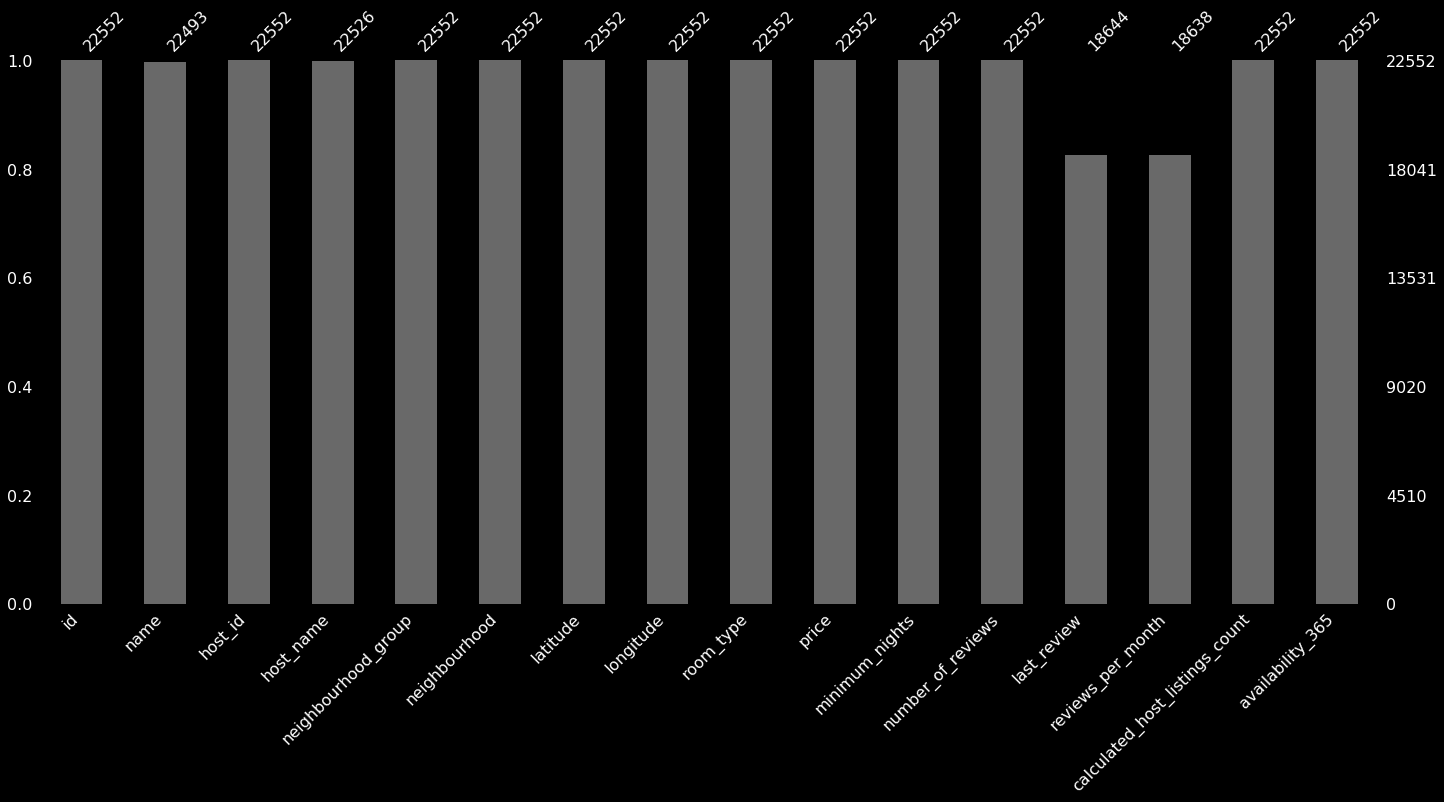

In [9]:
msno.bar(data)

In [10]:
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,2.255200e+04,2.255200e+04,22552.000000,22552.000000,22552.000000,22552.000000,22552.000000,18638.000000,22552.000000,22552.000000
mean,1.571560e+07,5.403355e+07,52.509824,13.406107,67.143668,7.157059,17.840679,1.135525,1.918233,79.852829
std,8.552069e+06,5.816290e+07,0.030825,0.057964,220.266210,40.665073,36.769624,1.507082,3.667257,119.368162
min,2.015000e+03,2.217000e+03,52.345803,13.103557,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,8.065954e+06,9.240002e+06,52.489065,13.375411,30.000000,2.000000,1.000000,0.180000,1.000000,0.000000
50%,1.686638e+07,3.126711e+07,52.509079,13.416779,45.000000,2.000000,5.000000,0.540000,1.000000,4.000000
75%,2.258393e+07,8.067518e+07,52.532669,13.439259,70.000000,4.000000,16.000000,1.500000,1.000000,129.000000
max,2.986735e+07,2.245081e+08,52.651670,13.757642,9000.000000,5000.000000,498.000000,36.670000,45.000000,365.000000


In [11]:
data.dropna(inplace=True)

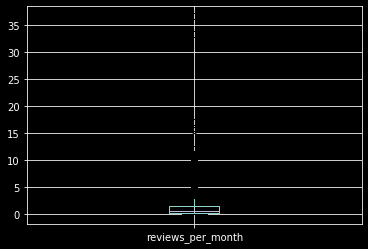

In [12]:
data.boxplot(column=["reviews_per_month"])

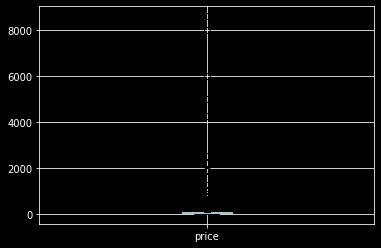

In [13]:
data.boxplot(column=["price"])

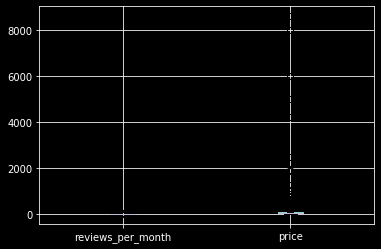

In [14]:
data.boxplot(column=["reviews_per_month", "price"])

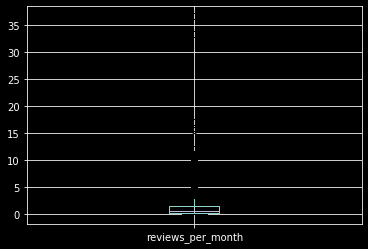

In [15]:
data.boxplot(column=["reviews_per_month"])

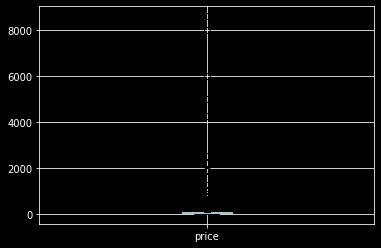

In [16]:
data.boxplot(column=["price"])

In [17]:
#melihat apakh terdapat data kosong
data.isnull().sum().sum()

0

MENAMBAH KOLOM BARU YAITU JARAK

In [ ]:
from geopy.distance import great_circle

def distance_from_centre(lat, lon):
    berlin_centre = (52.520008, 13.404954)
    apartment_spot = (lat, lon)
    return round(great_circle(berlin_centre, apartment_spot).km, 1)

data["Distance"] = data.apply(lambda x: distance_from_centre(x.latitude, x.longitude), axis=1)
data.head()

MENGANALISIS DAN MENGEKSPLORASI DATA

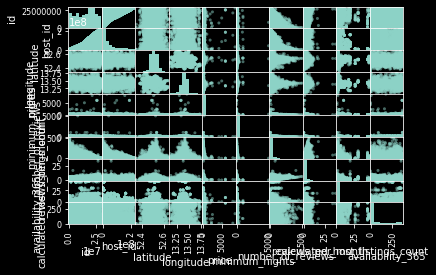

In [18]:
scatter_matrix(data)
plt.show()

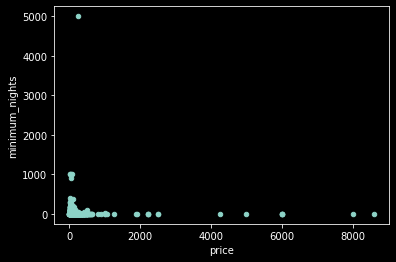

In [305]:
data.plot.scatter(x='price', y='minimum_nights')

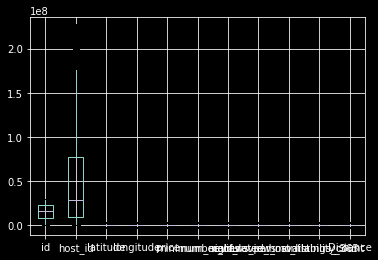

In [306]:
data.boxplot()

Text(0.5, 1.0, 'Comparing Type Of Room On The Basis Of Price')

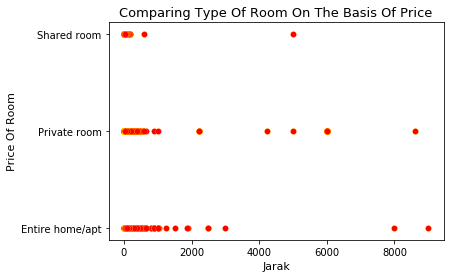

In [3]:
price = data['room_type']
jarak = data['price']
plt.scatter(jarak, price, c='r', edgecolors='yellow', linewidth=0.19)
plt.style.use('dark_background')
plt.style.context('dark_background')
plt.ylabel('Price Of Room',fontsize=11)
plt.xlabel('Jarak',fontsize=11)
plt.title("Comparing Type Of Room On The Basis Of Price",fontsize=13)

In [309]:
data.groupby("room_type").size()

room_type
Entire home/apt    8835
Private room       9534
Shared room         218
dtype: int64

In [310]:
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Distance
count,1.858700e+04,1.858700e+04,18587.000000,18587.000000,18587.000000,18587.000000,18587.000000,18587.000000,18587.000000,18587.000000,18587.000000
mean,1.529028e+07,5.192363e+07,52.509923,13.406351,61.990961,6.536127,21.617690,1.138112,1.933502,84.334320,4.520261
std,8.456565e+06,5.660290e+07,0.030543,0.057249,145.874539,43.156393,39.464083,1.508100,3.766036,120.513906,2.716378
min,2.015000e+03,2.217000e+03,52.345803,13.103557,0.000000,1.000000,1.000000,0.010000,1.000000,0.000000,0.100000
25%,7.797145e+06,8.579471e+06,52.489195,13.376423,30.000000,2.000000,3.000000,0.180000,1.000000,0.000000,3.000000
50%,1.643876e+07,2.892871e+07,52.509208,13.416857,46.000000,2.000000,7.000000,0.540000,1.000000,8.000000,4.100000
75%,2.218477e+07,7.724873e+07,52.532653,13.439131,70.000000,4.000000,21.000000,1.510000,1.000000,145.000000,5.400000
max,2.984956e+07,2.242958e+08,52.641499,13.757642,8600.000000,5000.000000,498.000000,36.670000,45.000000,365.000000,25.600000


Mengubah Nilai 0 menjadi Mean

In [417]:
meanprice = data['price'].mean()
data.replace({'price' : 0},meanprice,inplace=True)

Menghapus beberapa data yang memiliki outlier

In [418]:
data.drop(data[data.availability_365 < 1].index ,inplace =True)
data.drop(data[data.reviews_per_month > 10].index ,inplace =True)
data.drop(data[(data.minimum_nights >= 10) | ((data.minimum_nights >= 9) & (data.price > 125))].index ,inplace =True)
data.drop(data[data.calculated_host_listings_count >= 20 ].index ,inplace =True)
data.drop(data[(data.price < 10) | (data.price >=300) ].index ,inplace =True)

In [419]:
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Distance
count,8.997000e+03,8.997000e+03,8997.000000,8997.000000,8997.000000,8997.000000,8997.000000,8997.000000,8997.000000,8997.000000,8997.000000
mean,1.633225e+07,5.669670e+07,52.510341,13.404120,63.906298,2.529510,34.186173,1.791558,1.883406,143.969101,4.750495
std,9.063794e+06,6.246856e+07,0.032188,0.063379,42.894864,1.457086,50.130673,1.659435,2.335583,125.659573,3.131064
min,2.015000e+03,2.217000e+03,52.376407,13.103557,10.000000,1.000000,1.000000,0.010000,1.000000,1.000000,0.100000
25%,8.312910e+06,7.639103e+06,52.490164,13.368303,35.000000,1.000000,5.000000,0.560000,1.000000,30.000000,2.900000
50%,1.799072e+07,2.880277e+07,52.510177,13.413589,50.000000,2.000000,15.000000,1.230000,1.000000,94.000000,4.100000
75%,2.401258e+07,9.142808e+07,52.532788,13.438658,79.000000,3.000000,41.000000,2.530000,2.000000,279.000000,5.700000
max,2.981738e+07,2.242958e+08,52.641499,13.757642,299.000000,9.000000,498.000000,10.000000,19.000000,365.000000,25.600000


Mengecek TYPO DATA

In [420]:
data[['id','number_of_reviews','minimum_nights','calculated_host_listings_count','availability_365']].astype(dtype='int64',inplace = True).dropna()

,id,number_of_reviews,minimum_nights,calculated_host_listings_count,availability_365
0,2015,118,4,4,141
3,3309,25,5,1,297
4,7071,197,2,1,26
5,9991,6,6,1,137
9,17409,279,3,1,42
...,...,...,...,...,...
22442,29759681,1,1,2,43
22449,29772631,1,2,1,32
22463,29784461,5,1,2,339
22475,29792124,1,1,1,8


In [421]:
data[['reviews_per_month','price','Distance']].astype(dtype ='float', inplace = True)

,reviews_per_month,price,Distance
0,3.76,60.0,1.6
3,0.39,26.0,4.5
4,1.75,42.0,2.7
5,0.15,180.0,1.6
9,2.83,45.0,1.1
...,...,...,...
22442,1.00,35.0,5.7
22449,1.00,25.0,6.1
22463,5.00,99.0,10.8
22475,1.00,25.0,4.4


Mengecek data duplikat

In [422]:
data.drop_duplicates (subset =["id","room_type","price","latitude","longitude"], keep= 'first', inplace = True)

In [423]:
data.shape

(8997, 17)

<h3>Melakukan one hot encorder<h3>

In [424]:
#onehotencoding
categorical_feature_mask = data.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = data.columns[categorical_feature_mask].tolist()
le = LabelEncoder()
data[categorical_cols] = data[categorical_cols].apply(lambda col: le.fit_transform(col))
data[categorical_cols].head()

,name,host_name,neighbourhood_group,neighbourhood,room_type,last_review
0,1454,1242,4,18,0,629
3,1483,1357,10,109,1,556
4,1943,458,6,48,1,636
5,3954,2418,6,97,0,532
9,3460,3096,6,97,1,632


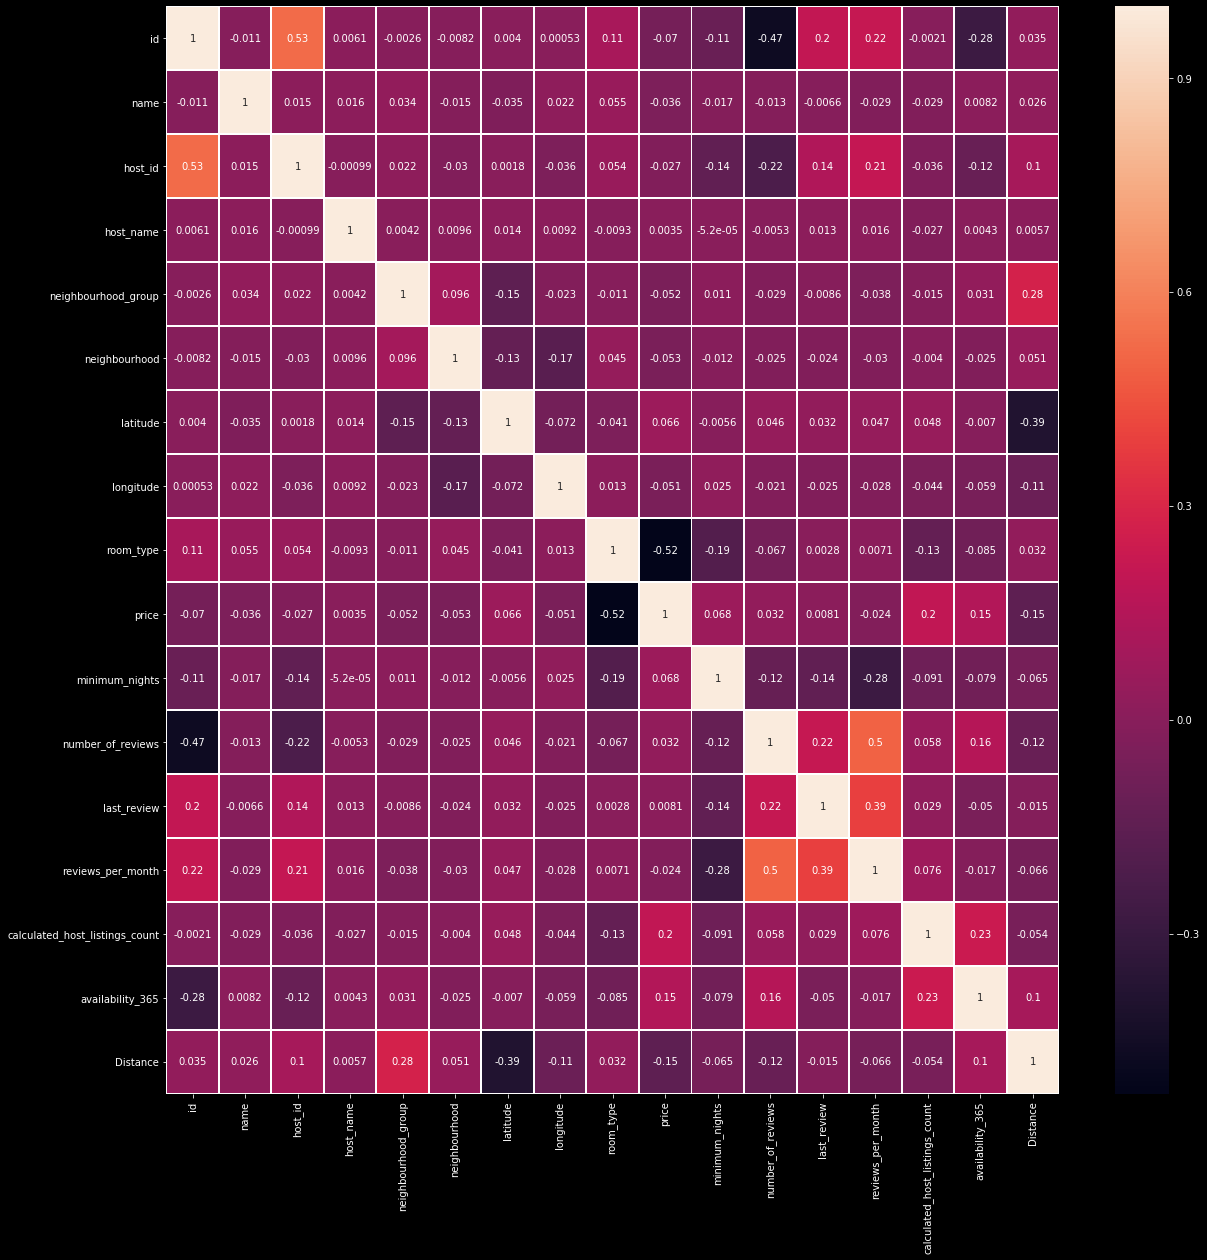

In [425]:
#correlation
f, ax = plt.subplots( figsize=(20,20) )
sns.heatmap(data.corr(),annot=True,linewidths=1)
plt.show()

<h3>Memilih kolom yang akan digunakan<h3>

In [477]:
newdata = ["room_type","neighbourhood_group","id","price","reviews_per_month"]
databaru= data[newdata]
databaru.head()

,room_type,neighbourhood_group,id,price,reviews_per_month,Distance
0,0,4,2015,60.0,3.76,1.6
3,1,10,3309,26.0,0.39,4.5
4,1,6,7071,42.0,1.75,2.7
5,0,6,9991,180.0,0.15,1.6
9,1,6,17409,45.0,2.83,1.1


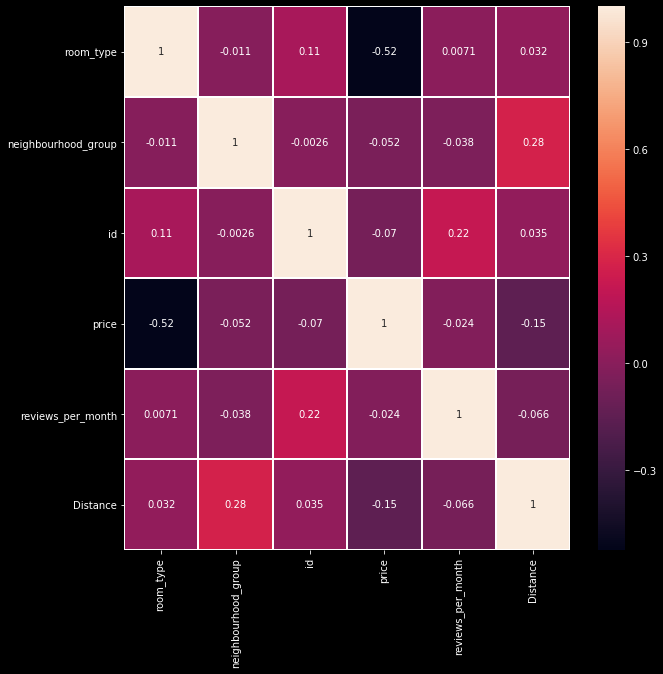

In [478]:
#correlation
f, ax = plt.subplots( figsize=(10,10) )
sns.heatmap(databaru.corr(),annot=True,linewidths=1)
plt.show()

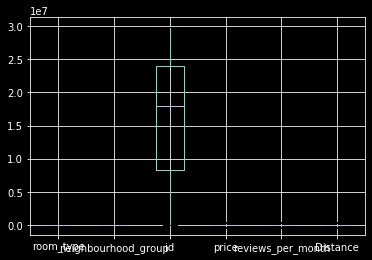

In [479]:
boxplot = databaru.boxplot()

In [480]:
mms = MinMaxScaler()
databaru[["id","price","reviews_per_month"]] = mms.fit_transform(databaru[["id","price","reviews_per_month"]])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [481]:
databaru.describe()

,room_type,neighbourhood_group,id,price,reviews_per_month,Distance
count,8997.000000,8997.000000,8997.000000,8997.000000,8997.000000,8997.000000
mean,0.551962,4.249416,0.547712,0.186527,0.178334,0.182372
std,0.520474,3.037126,0.303997,0.148425,0.166110,0.122787
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.278745,0.086505,0.055055,0.109804
50%,1.000000,4.000000,0.603337,0.138408,0.122122,0.156863
75%,1.000000,6.000000,0.805308,0.238754,0.252252,0.219608
max,2.000000,11.000000,1.000000,1.000000,1.000000,1.000000


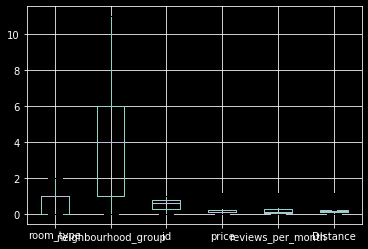

In [482]:
databaru.boxplot()

In [483]:
databaru.drop(databaru[databaru.price >= 0.4].index ,inplace =True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


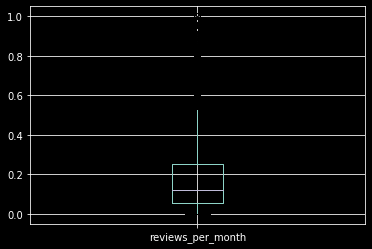

In [484]:
databaru.boxplot(column=["reviews_per_month"])

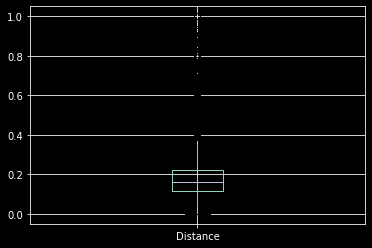

In [486]:
databaru.drop(databaru[databaru.Distance > 0.110].index ,inplace =True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


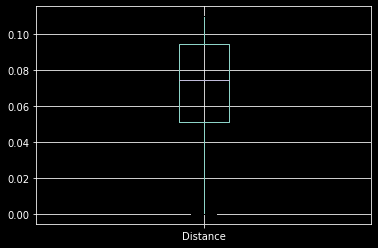

In [487]:
databaru.boxplot(column=["Distance"])

In [488]:
databaru.shape

(1964, 6)

In [489]:
databaru.drop(databaru[databaru.reviews_per_month > 0.6].index ,inplace =True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


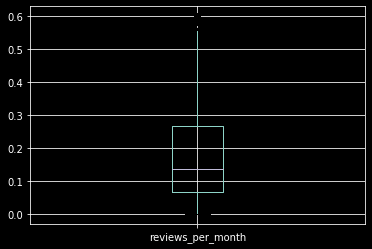

In [490]:
databaru.boxplot(column=["reviews_per_month"])

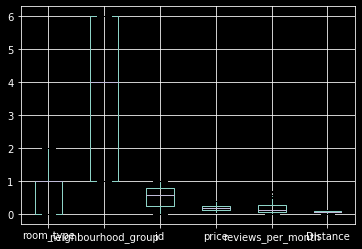

In [491]:
databaru.boxplot()

Text(0.5, 1.0, 'Comparing Price On Review')

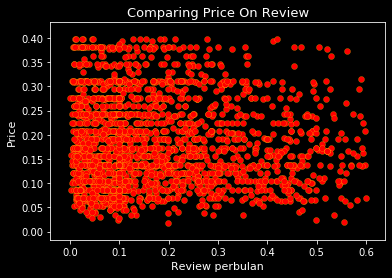

In [492]:
price = databaru['price']
jarak = databaru['reviews_per_month']
plt.scatter(jarak, price, c='r', edgecolors='yellow', linewidth=0.19)
plt.style.use('dark_background')
plt.style.context('dark_background')
plt.ylabel('Price',fontsize=11)
plt.xlabel('Review perbulan',fontsize=11)
plt.title("Comparing Price On Review",fontsize=13)

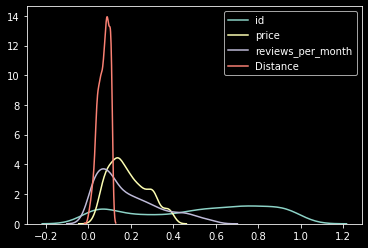

In [494]:
sns.kdeplot(databaru['id'])
sns.kdeplot(databaru['price'])
sns.kdeplot(databaru['reviews_per_month'])

In [495]:
databaru.to_csv('Dataset1.csv')

<h2>Clustering Menggunakan K-Means<h2>

<h3>METODE ELBOW<h3>

Text(0, 0.5, 'Within Sum Square')

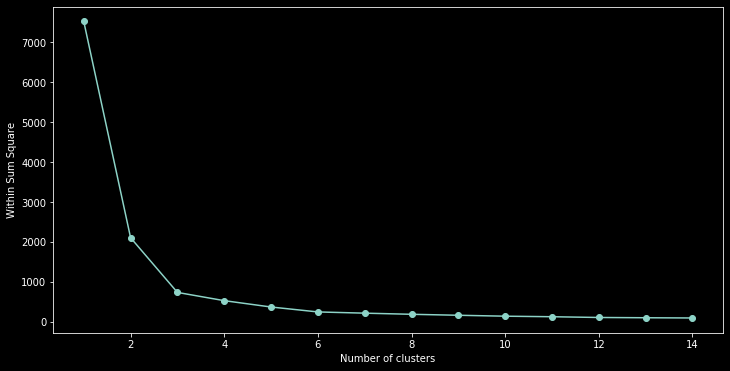

In [443]:
from sklearn.cluster import KMeans
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,15):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(databaru)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,15), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Within Sum Square')

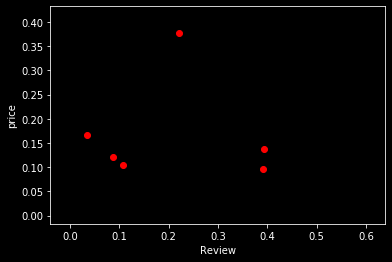

In [444]:
# Step 1 and 2 - Choose the number of clusters (k) and select random centroid for each cluster
X = databaru[["reviews_per_month","price"]]
#number of clusters
K=6

# Select random observation as centroids
Centroids = (X.sample(n=K))
plt.scatter(X["reviews_per_month"],X["price"],c='black')
plt.scatter(Centroids["reviews_per_month"],Centroids["price"],c='red')
plt.xlabel('Review')
plt.ylabel('price')
plt.show()

K-Means

In [445]:
different = 1
j=0

while(different!=0):
    new=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in new.iterrows():
            d1=(row_c["reviews_per_month"]-row_d["reviews_per_month"])**2
            d2=(row_c["price"]-row_d["price"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["price","reviews_per_month"]]
    if j == 0:
        different=1
        j=j+1
    else:
        different = (Centroids_new['price'] - Centroids['price']).sum() + (Centroids_new['reviews_per_month'] - Centroids['reviews_per_month']).sum()
        print(different.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["price","reviews_per_month"]]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0.08752637874285173
0.08948374449653758
0.05970108924480196
0.04785732184219278
0.041015740484527746
0.028857036481892265
0.010212526356274843
0.004503516543582664
0.0022369295844683473
-0.0028279242507002894
-0.004625816292956456
-0.0003878001073997356
-0.0021934960733056147
-0.006918135367478928
-0.0066659533891097605
-0.0076744615862691795
-0.01024173971216677
-0.006904477219605298
-0.005214348426503701
-0.006342260700935243
-0.004888198916607633
-0.005994458388284635
-0.006628122350439761
-0.005053442272812819
-0.002387125997086237
-0.0026834483845609852
-0.003563809723360234
-0.004634052590096291
-0.003504217346579505
-0.0034069951288546313
-0.0012590978297379873
0.0008785233947087301
0.0005624021730448597
0.000467606194358261
0.00023429420372221565
-0.0018951317161044062
-0.006295743949872784
-0.004062759245420489
-0.00654214967620842
-0.006475350441293798
-0.006817153077078711
-0.0029310018198928506
-0.0019309806927086393
-0.0018713976308535607
-0.005139628504963356
-0.002926343

In [446]:
X.to_csv('hasilclustering.csv')

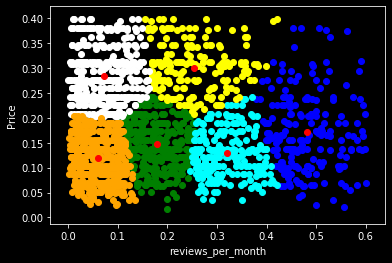

In [447]:
color=['blue','green','cyan','yellow','white','orange','pink']
for i in range(K):
    databaru=X[X["Cluster"]==i+1]
    plt.scatter(databaru["reviews_per_month"],databaru["price"],c=color[i])
plt.scatter(Centroids["reviews_per_month"],Centroids["price"],c='red')
plt.xlabel('reviews_per_month')
plt.ylabel('Price')
plt.show()

<h2>KLASIFIKASI DATA<h2>

In [460]:
hasil = pd.read_csv(r'hasilclustering.csv')

In [461]:
features_name = ["price", "reviews_per_month"]

In [462]:
X = hasil[features_name]
y = hasil["Cluster"]

Melakukan split data untuk klasifikasi

In [463]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<h4>Gaussian Naive Bayes<h4>

In [455]:
from sklearn.naive_bayes import GaussianNB
#Create a Gaussian Classifier
gauss = GaussianNB()
#Train the model using the training sets
gauss.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = gauss.predict(X_test)

In [456]:
from sklearn import metrics
print("Hasil Akurasi Gauss", metrics.accuracy_score(y_test, y_pred))

Hasil Akurasi Gauss 0.9744680851063829


<h4>Support Vector Machine<h4>

In [466]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
y_pred4 = svm.predict(X_test)
print("Hasil Akurasi SVM:",metrics.accuracy_score(y_test, y_pred4))

Hasil Akurasi SVM: 0.951063829787234


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


<h4>Decision Tree Classifier<h4>

In [465]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
prediksi = clf.predict(X_test)
print("Hasil Akurasi Decision Tree Classifier :",metrics.accuracy_score(y_test, prediksi))

Hasil Akurasi Decision Tree Classifier : 0.9659574468085106


<h4>Logistic Regression<h4>

In [464]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Hasil = clf.predict(X_test)
print("Hasil Akurasi Logistic Reg :",metrics.accuracy_score(y_test, Hasil))

Hasil Akurasi Logistic Reg : 0.9659574468085106


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


<H4> KNN <H4>

In [475]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
y_pred2 = knn.predict(X_test)
print("Hasil Akurasi Kneighbors:",metrics.accuracy_score(y_test, y_pred2)) 

Hasil Akurasi Kneighbors: 0.9659574468085106
